## Python - 22146

# Group 1: Analysis on Subway Felonies and crimes occurred from 2019 to 2024 Feb

## By:
### Shubham Mittal
### Akshat Shanbhag
### Swayambhu Dhuri


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 8)
from prettytable import PrettyTable
table = PrettyTable()

# Load the dataset
data = pd.read_csv("MTA_Major_Felonies.csv")

## Mathematical Representation to Calculate,
### ```      Crimes per Million Riders = (fellony_type/ridership) * 1000000 ```


In [83]:
data.head()

,Month,Agency,Police Force,Felony Type,Felony Count,Crimes per Million Riders
0,01/01/2019,MNR,MTAPD,Burglary,1,0.15
1,01/01/2019,MNR,MTAPD,Felony Assault,3,0.44
2,01/01/2019,MNR,MTAPD,Murder,0,0.00
3,01/01/2019,MNR,MTAPD,Rape,0,0.00
4,01/01/2019,MNR,MTAPD,Robbery,1,0.15


In [84]:
data.shape

(1506, 6)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      1506 non-null   object 
 1   Agency                     1506 non-null   object 
 2   Police Force               1506 non-null   object 
 3   Felony Type                1506 non-null   object 
 4   Felony Count               1506 non-null   int64  
 5   Crimes per Million Riders  1499 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 70.7+ KB


In [86]:
# Convert 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%m/%d/%Y')

In [87]:
data.isna().sum()

Month                        0
Agency                       0
Police Force                 0
Felony Type                  0
Felony Count                 0
Crimes per Million Riders    7
dtype: int64

In [88]:
data.fillna(0, inplace=True)

In [89]:
data.isna().sum()

Month                        0
Agency                       0
Police Force                 0
Felony Type                  0
Felony Count                 0
Crimes per Million Riders    0
dtype: int64

In [90]:
unique_data = ['Agency', 'Felony Type', 'Police Force']

table.field_names = ["Column Name", "Unique Values"]

for unique in unique_data:
    table.add_row([unique, data[unique].unique()])

print(table)

+--------------+------------------------------------------------------------------------+
| Column Name  |                             Unique Values                              |
+--------------+------------------------------------------------------------------------+
|    Agency    |                      ['MNR' 'LIRR' 'NYCT' 'SIR']                       |
| Felony Type  | ['Burglary' 'Felony Assault' 'Murder' 'Rape' 'Robbery' 'Grand Larceny' |
|              |                          'Grand Larceny Auto']                         |
| Police Force |                            ['MTAPD' 'NYPD']                            |
+--------------+------------------------------------------------------------------------+


In [91]:
data['Felony Type'].unique()

array(['Burglary', 'Felony Assault', 'Murder', 'Rape', 'Robbery',
       'Grand Larceny', 'Grand Larceny Auto'], dtype=object)

In [92]:
data['Police Force'].unique()

array(['MTAPD', 'NYPD'], dtype=object)

In [93]:
grouped_data = data.groupby(['Month', 'Agency']).sum().reset_index()

<ipython-input-93-1344747dee21>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['Month', 'Agency']).sum().reset_index()


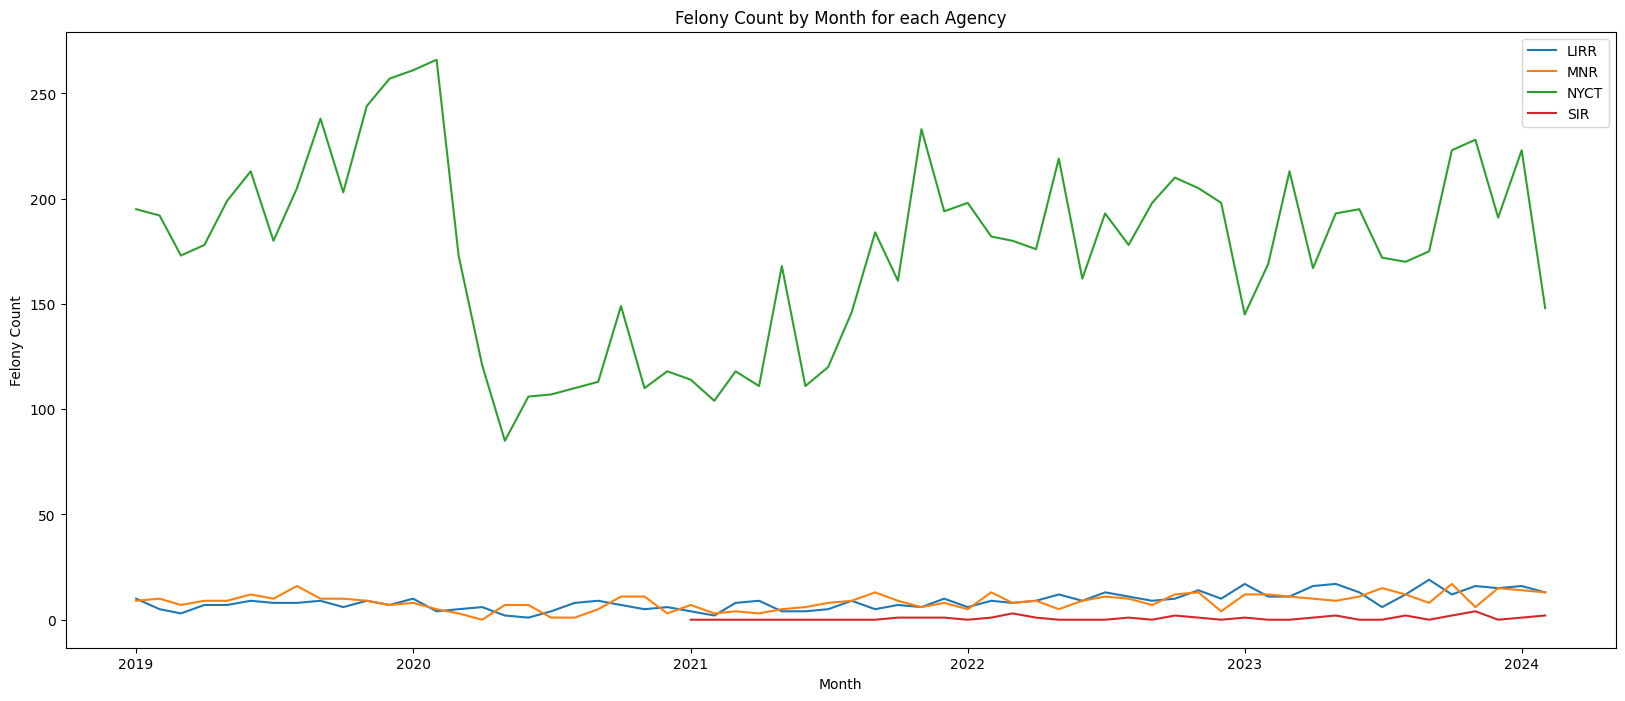

In [94]:
for agency, df in grouped_data.groupby('Agency'):
  plt.plot(df['Month'], df['Felony Count'], label=agency)
plt.title('Felony Count by Month for each Agency')
plt.xlabel('Month')
plt.ylabel('Felony Count')
plt.legend()
plt.show()

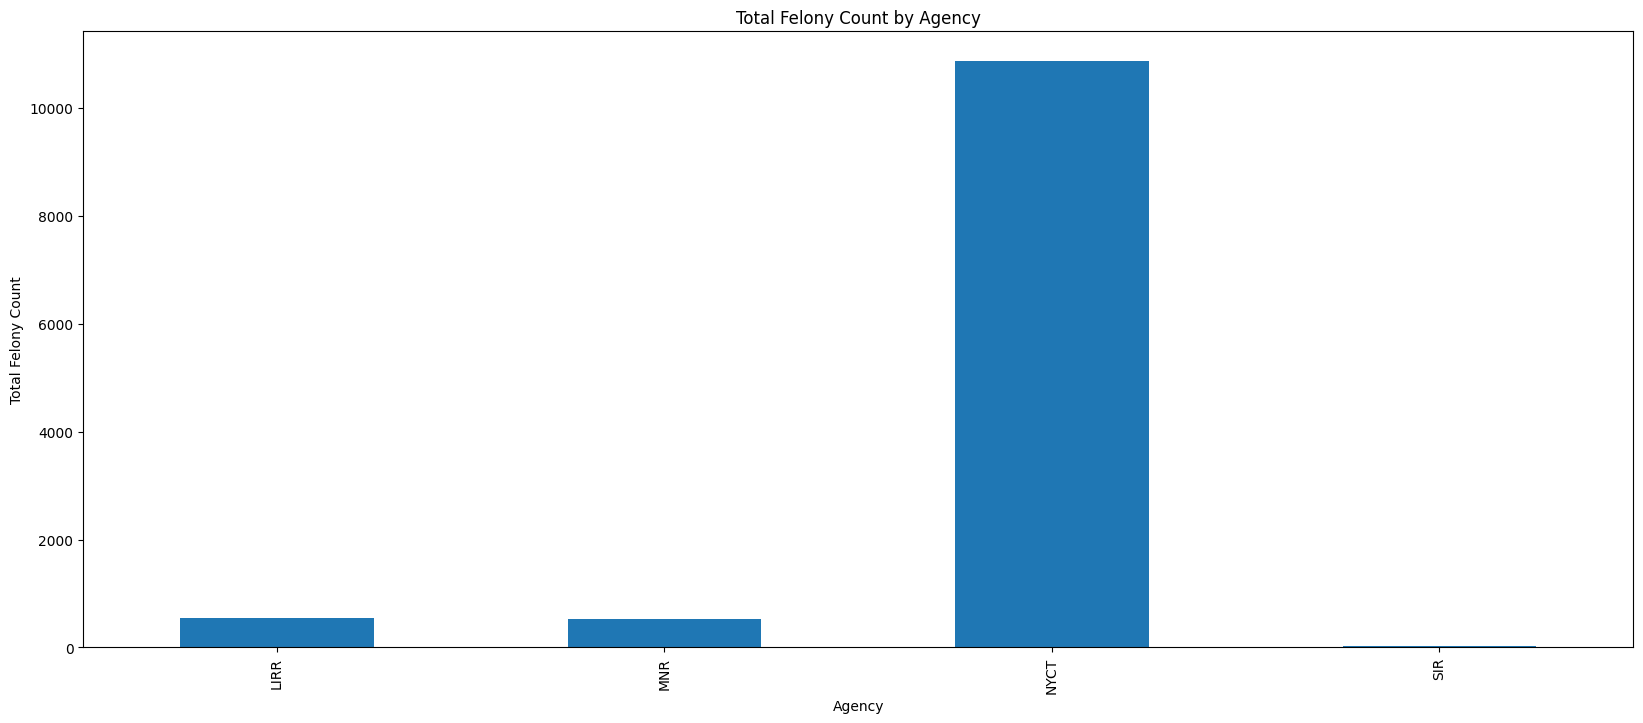

In [95]:
total_felony_by_agency = grouped_data.groupby('Agency')['Felony Count'].sum()
total_felony_by_agency.plot(kind='bar')
plt.title('Total Felony Count by Agency')
plt.xlabel('Agency')
plt.ylabel('Total Felony Count')
plt.show()

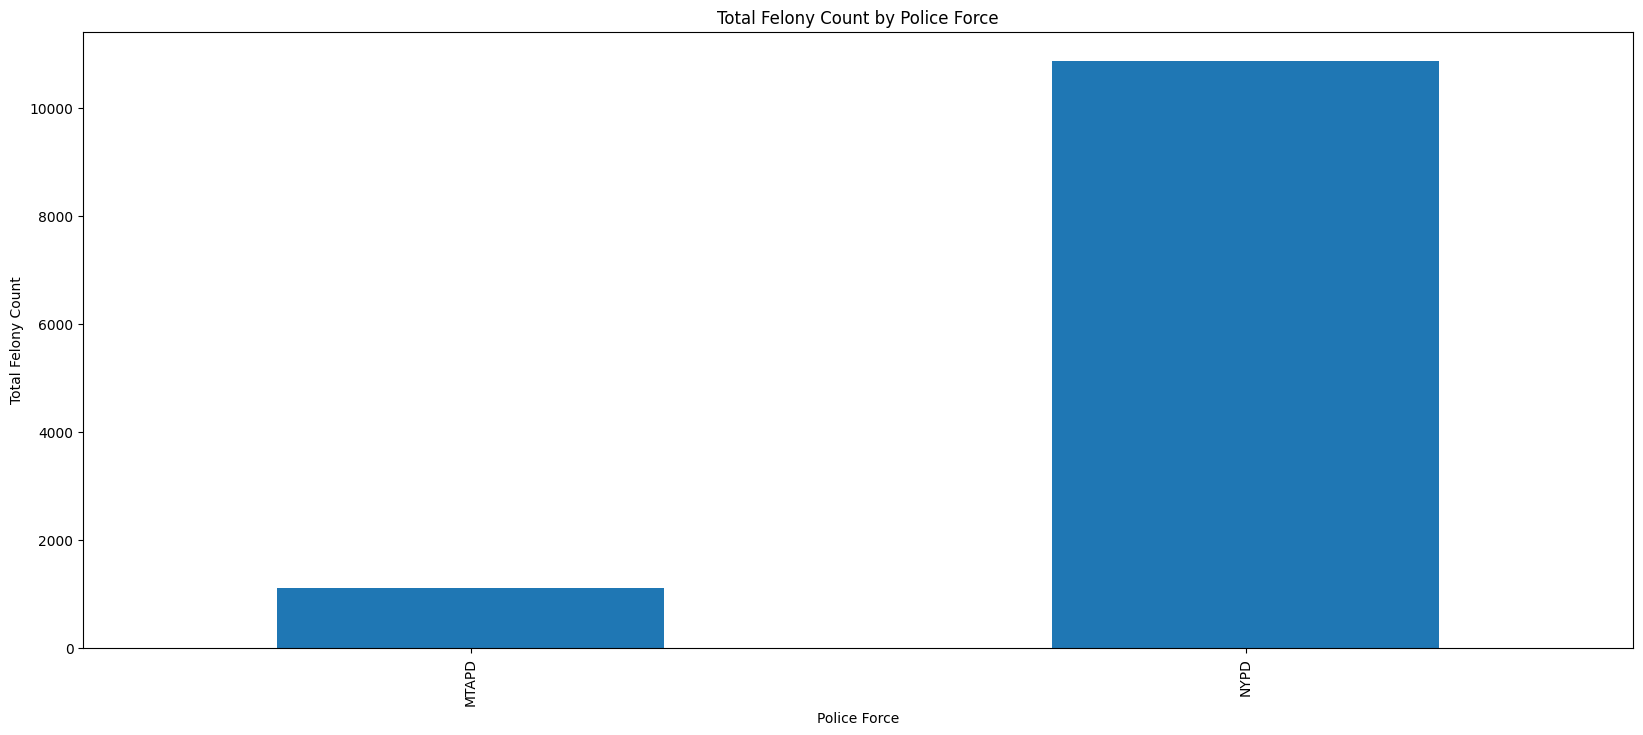

In [96]:
total_felony_by_police_force = data.groupby('Police Force')['Felony Count'].sum()
total_felony_by_police_force.plot(kind='bar')
plt.title('Total Felony Count by Police Force')
plt.xlabel('Police Force')
plt.ylabel('Total Felony Count')
plt.show()

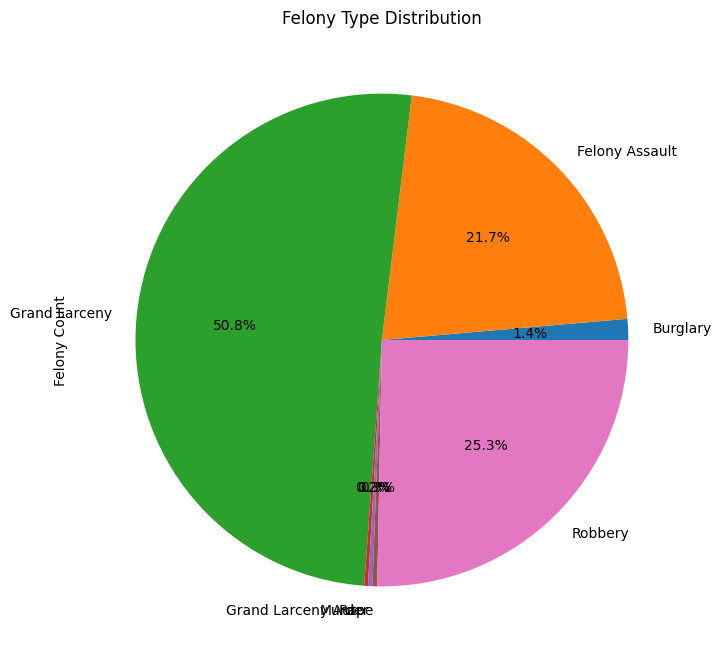

In [97]:
felony_type_distribution = data.groupby('Felony Type')['Felony Count'].sum()
felony_type_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Felony Type Distribution')
plt.show()

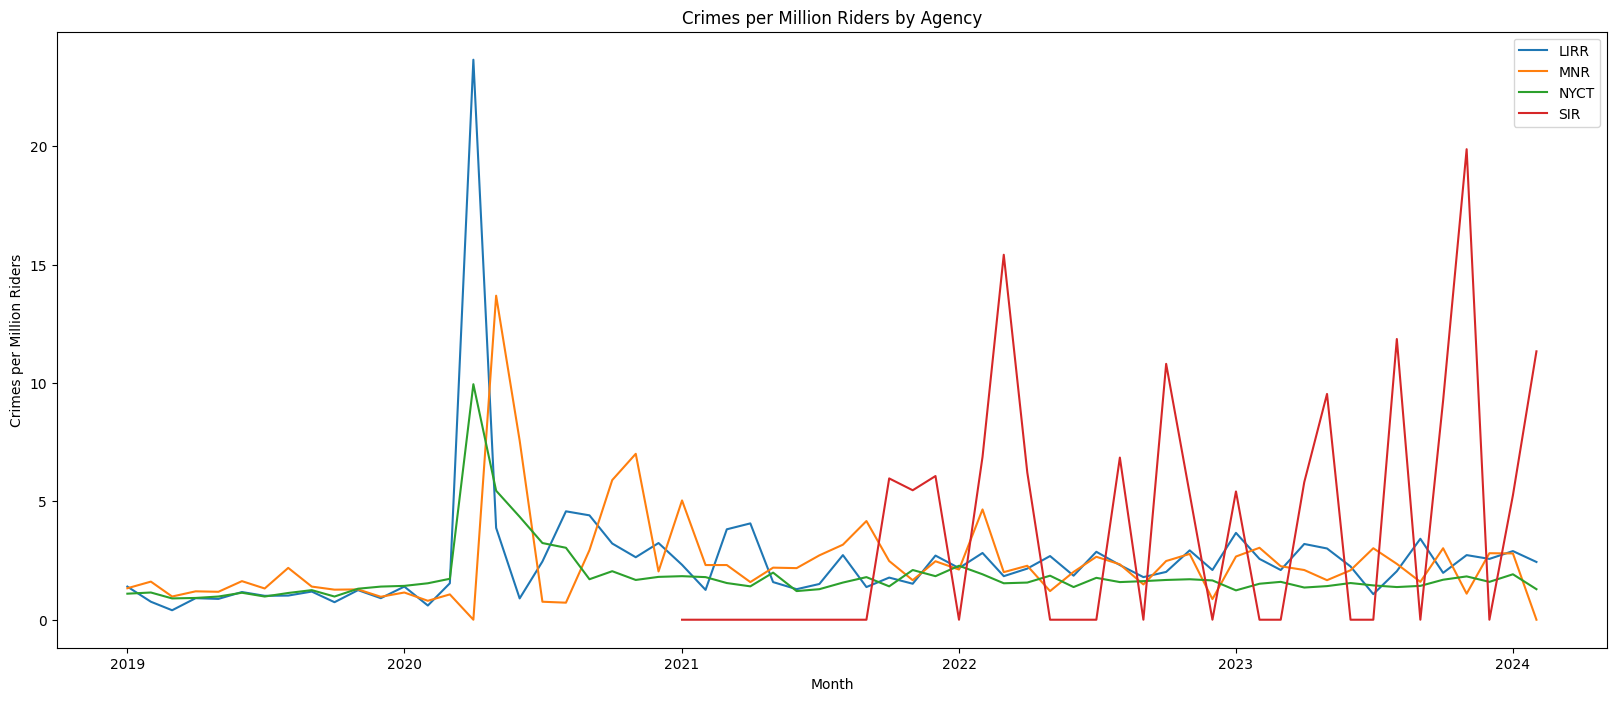

In [98]:
for agency, df in grouped_data.groupby('Agency'):
    plt.plot(df['Month'], df['Crimes per Million Riders'], label=agency)
plt.title('Crimes per Million Riders by Agency')
plt.xlabel('Month')
plt.ylabel('Crimes per Million Riders')
plt.legend()
plt.show()

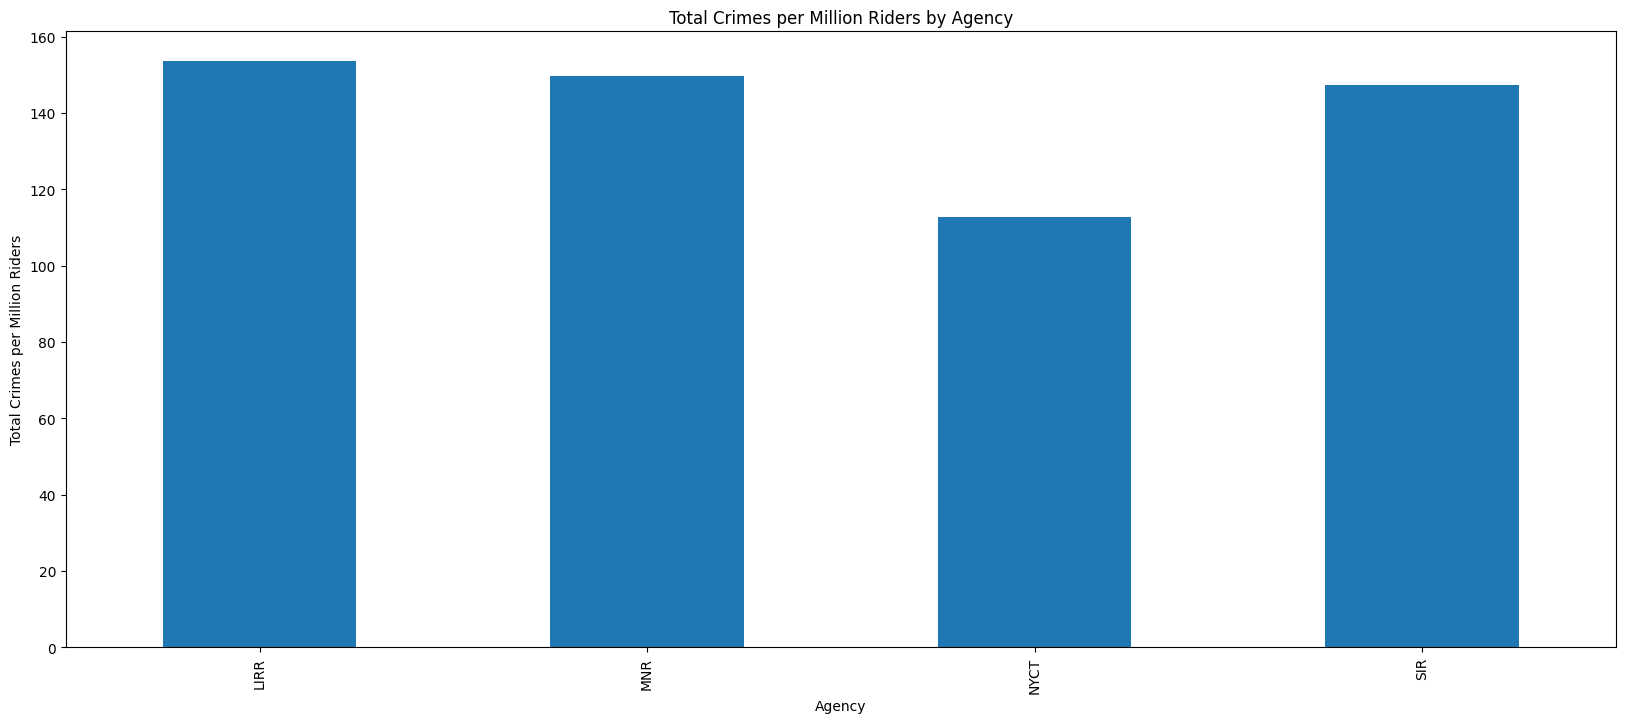

In [99]:
total_crimes_per_million_by_agency = grouped_data.groupby('Agency')['Crimes per Million Riders'].sum()
total_crimes_per_million_by_agency.plot(kind='bar')
plt.title('Total Crimes per Million Riders by Agency')
plt.xlabel('Agency')
plt.ylabel('Total Crimes per Million Riders')
plt.show()

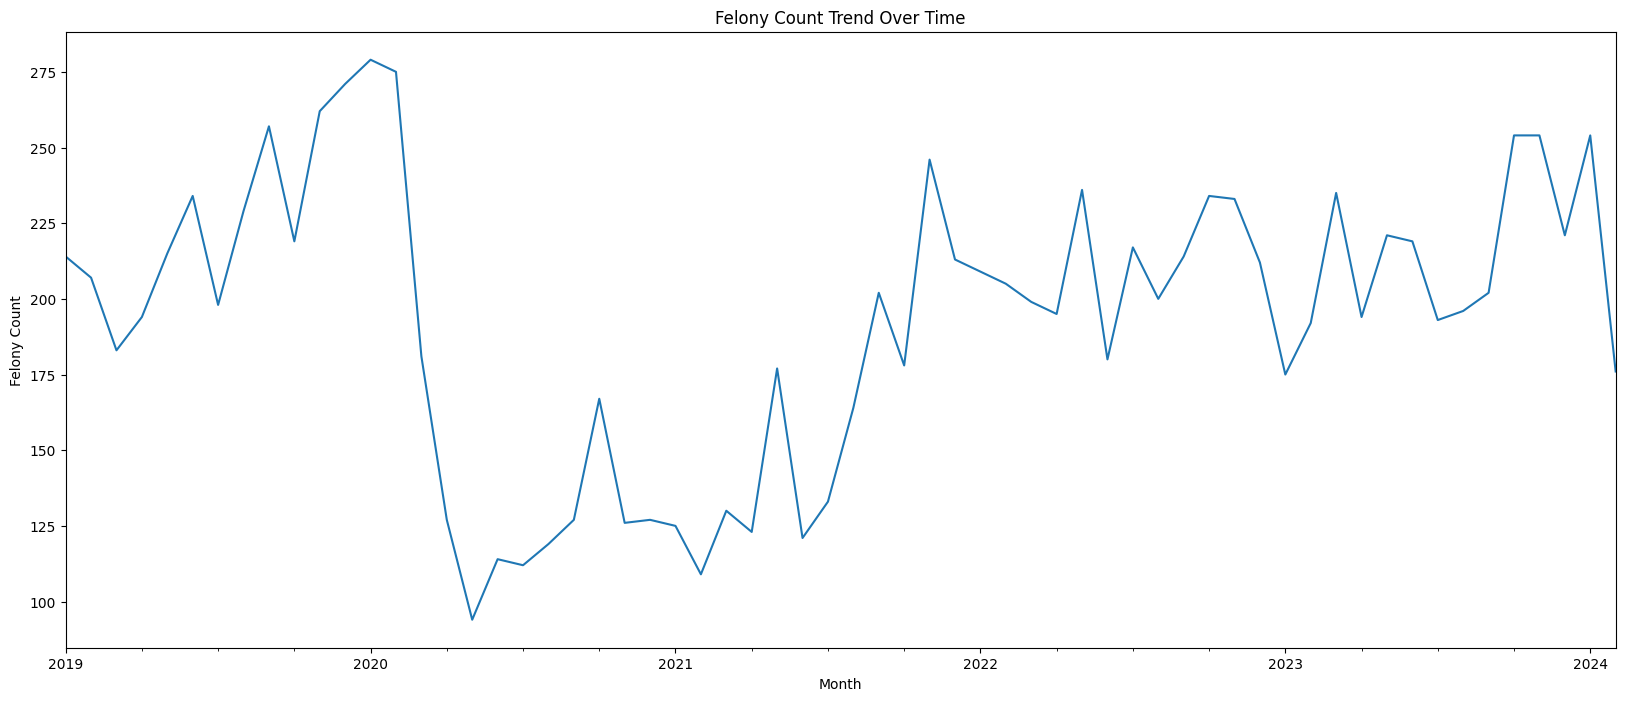

In [100]:
felony_count_trend = data.groupby('Month')['Felony Count'].sum()
felony_count_trend.plot()
plt.title('Felony Count Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Felony Count')
plt.show()

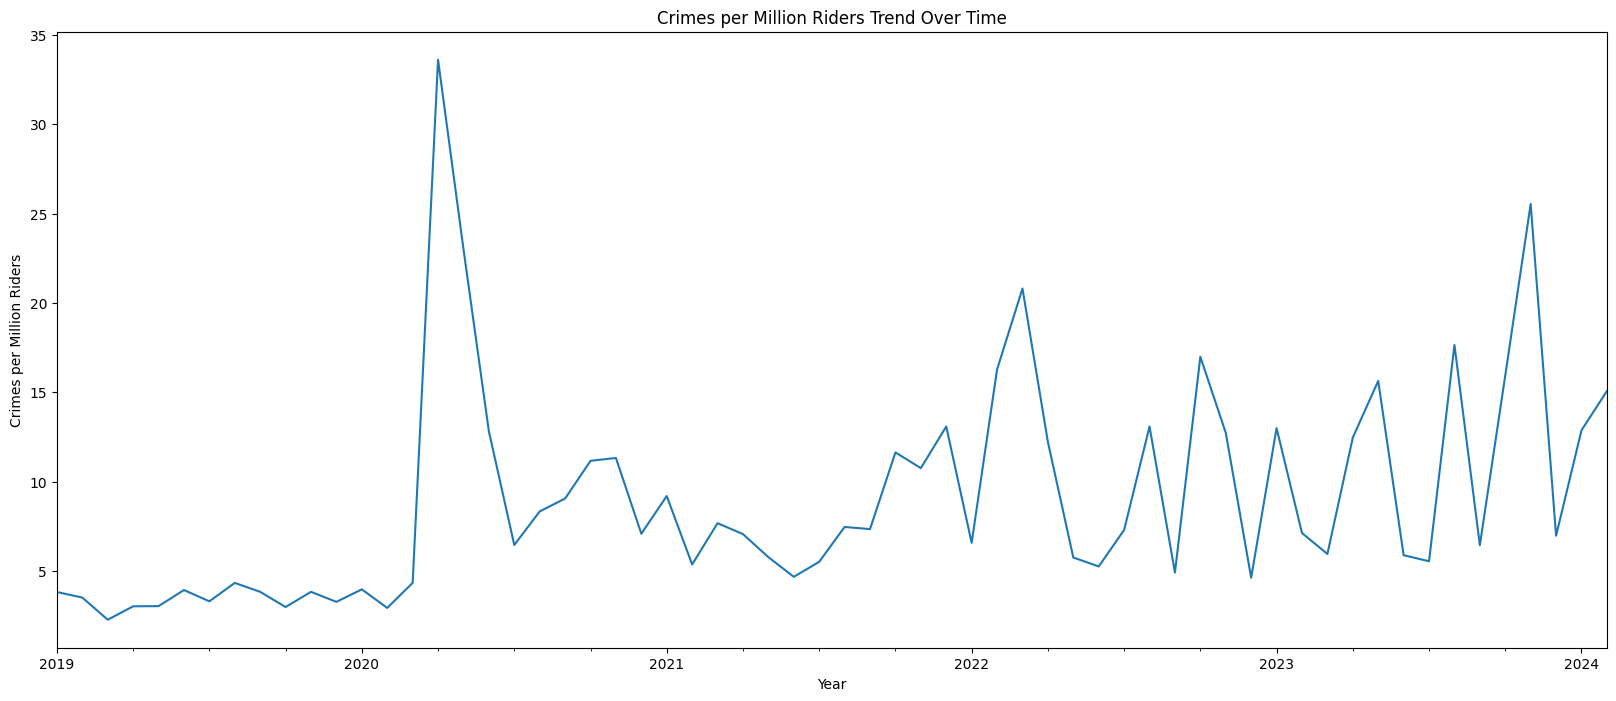

In [101]:
crimes_per_million_trend = data.groupby('Month')['Crimes per Million Riders'].sum()
crimes_per_million_trend.plot()
plt.title('Crimes per Million Riders Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Crimes per Million Riders')
plt.show()

In [102]:
police_felony = data.copy()

In [103]:
police_felony['Year'] = police_felony['Month'].dt.year

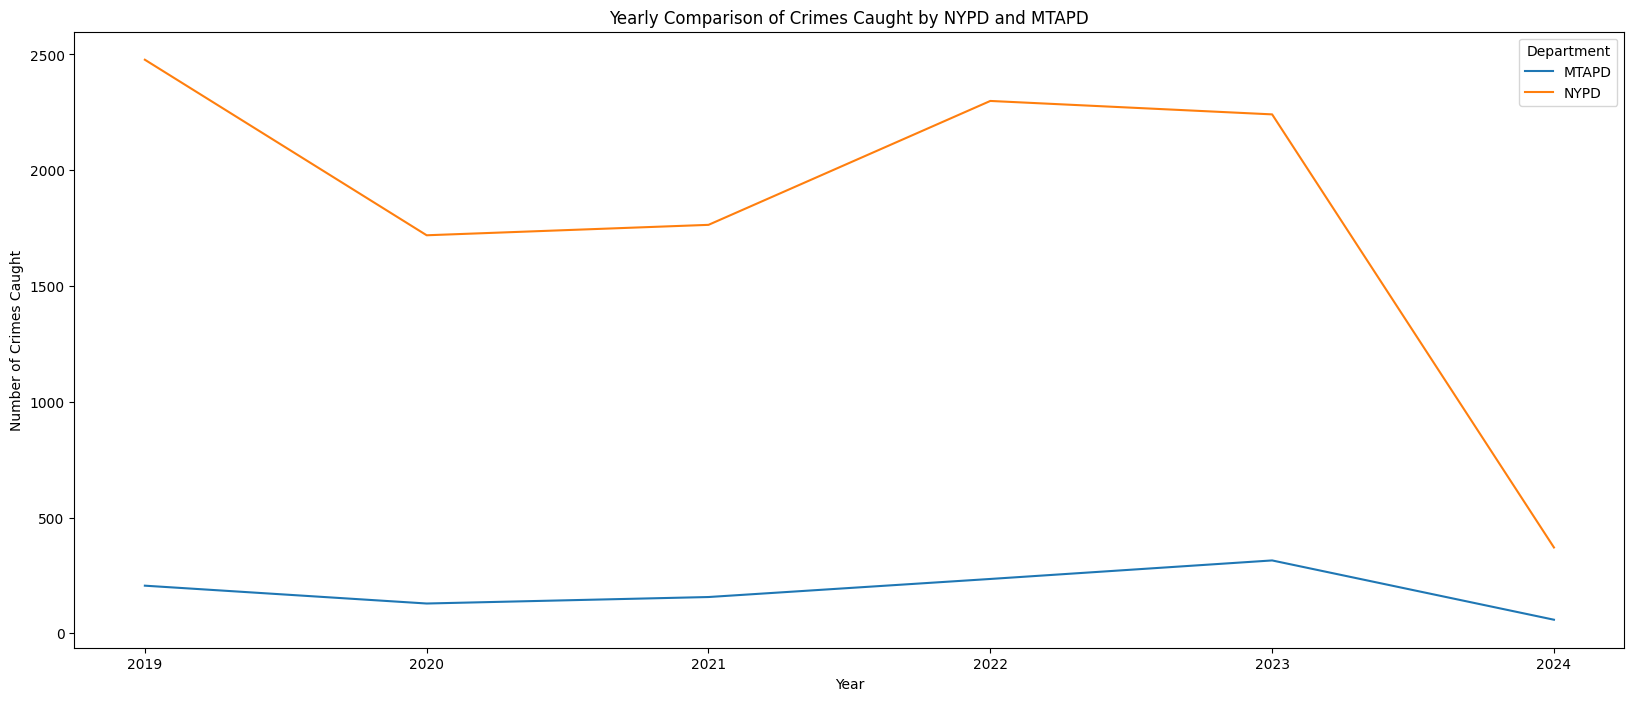

In [104]:
department_yearly_crimes = police_felony.groupby(['Police Force', 'Year'])['Felony Count'].sum().unstack('Police Force')

department_yearly_crimes.plot(kind='line')

plt.title('Yearly Comparison of Crimes Caught by NYPD and MTAPD')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Caught')
plt.legend(title='Department')
plt.show()

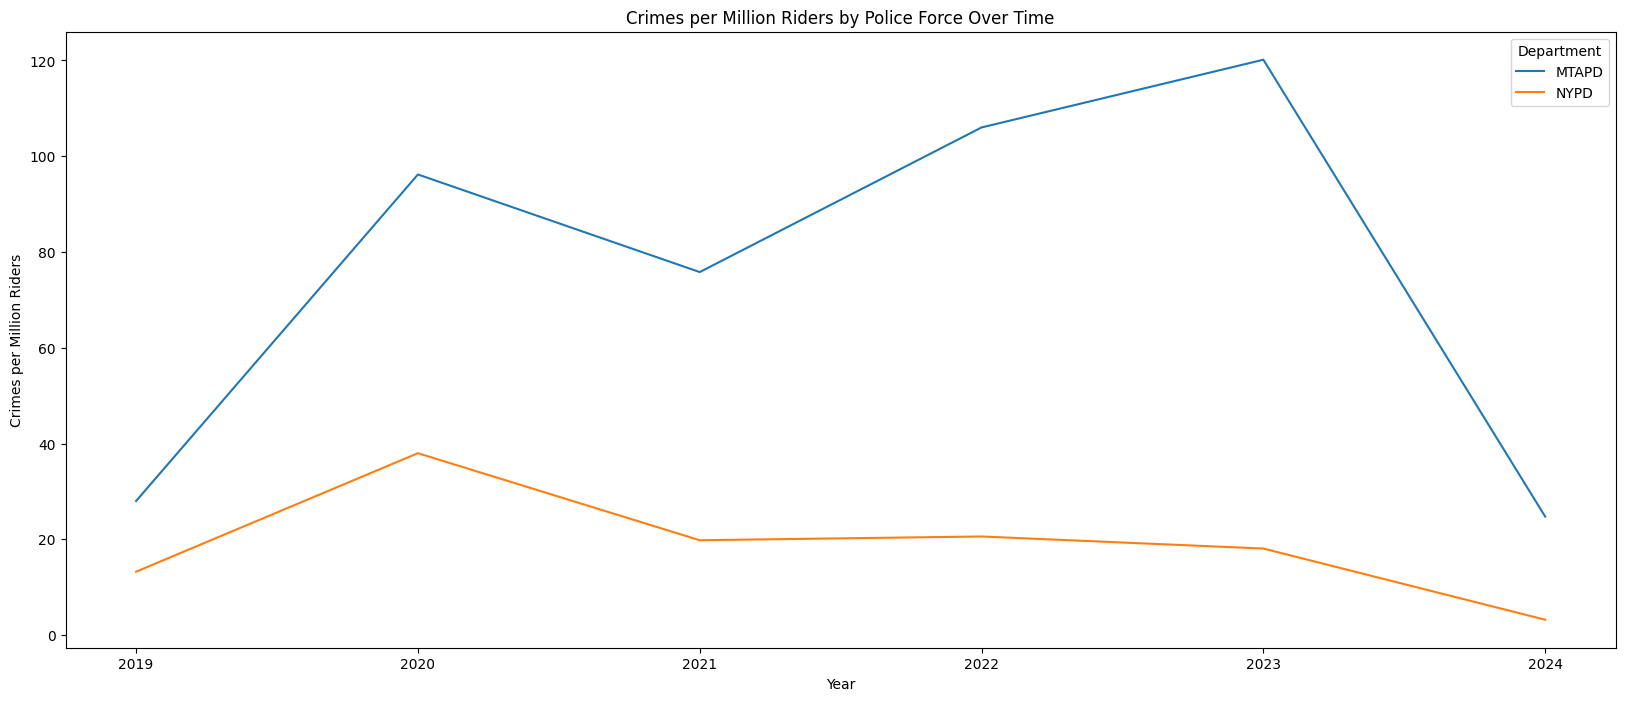

In [105]:
department_yearly_crimes = police_felony.groupby(['Police Force', 'Year'])['Crimes per Million Riders'].sum().unstack('Police Force')

department_yearly_crimes.plot(kind='line')

plt.title('Crimes per Million Riders by Police Force Over Time')
plt.xlabel('Year')
plt.ylabel('Crimes per Million Riders')
plt.legend(title='Department')
plt.show()

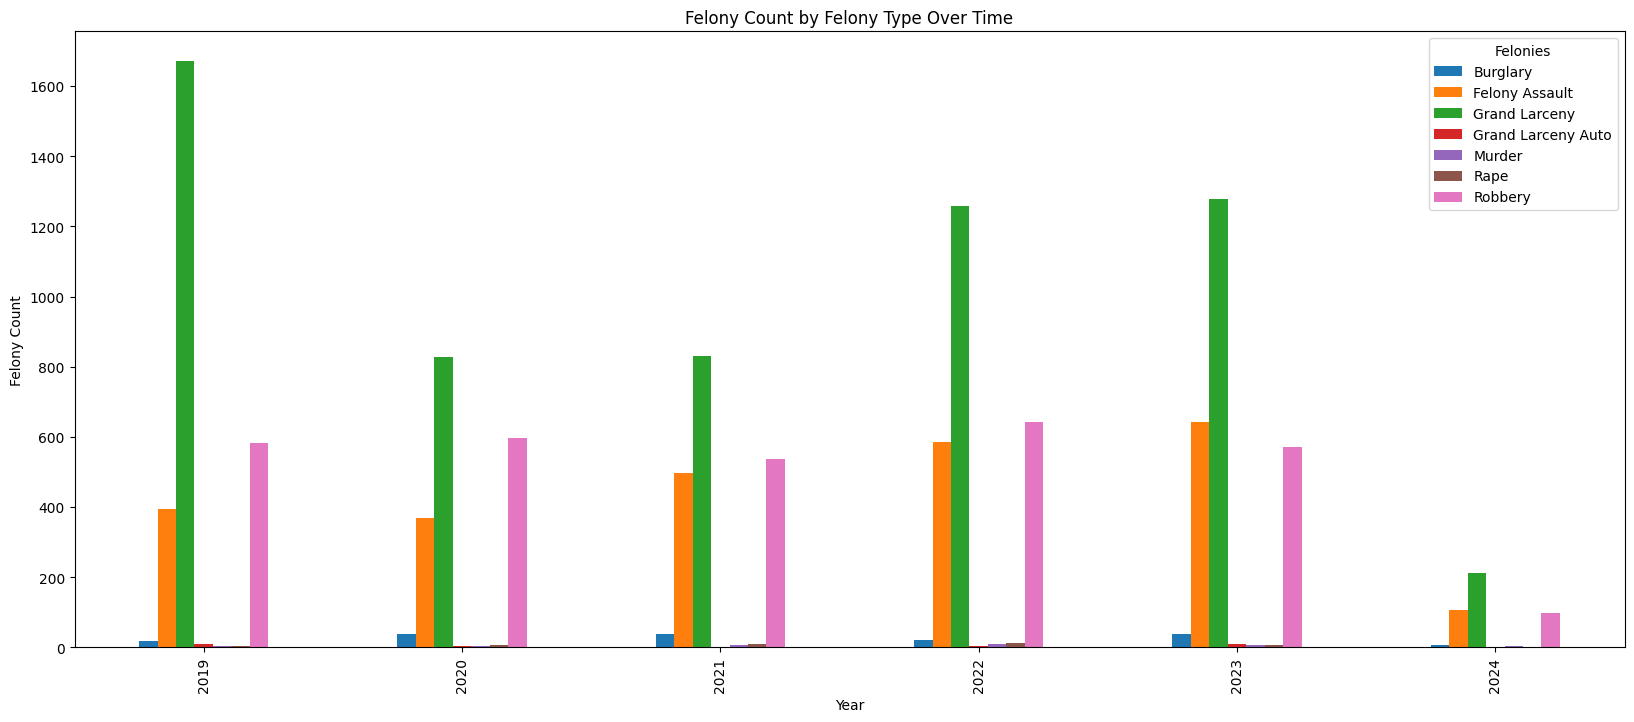

In [106]:
department_yearly_crimes = police_felony.groupby(['Felony Type', 'Year'])['Felony Count'].sum().unstack('Felony Type')
department_yearly_crimes.plot(kind='bar')

plt.title('Felony Count by Felony Type Over Time')
plt.xlabel('Year')
plt.ylabel('Felony Count')
plt.legend(title='Felonies')
plt.show()

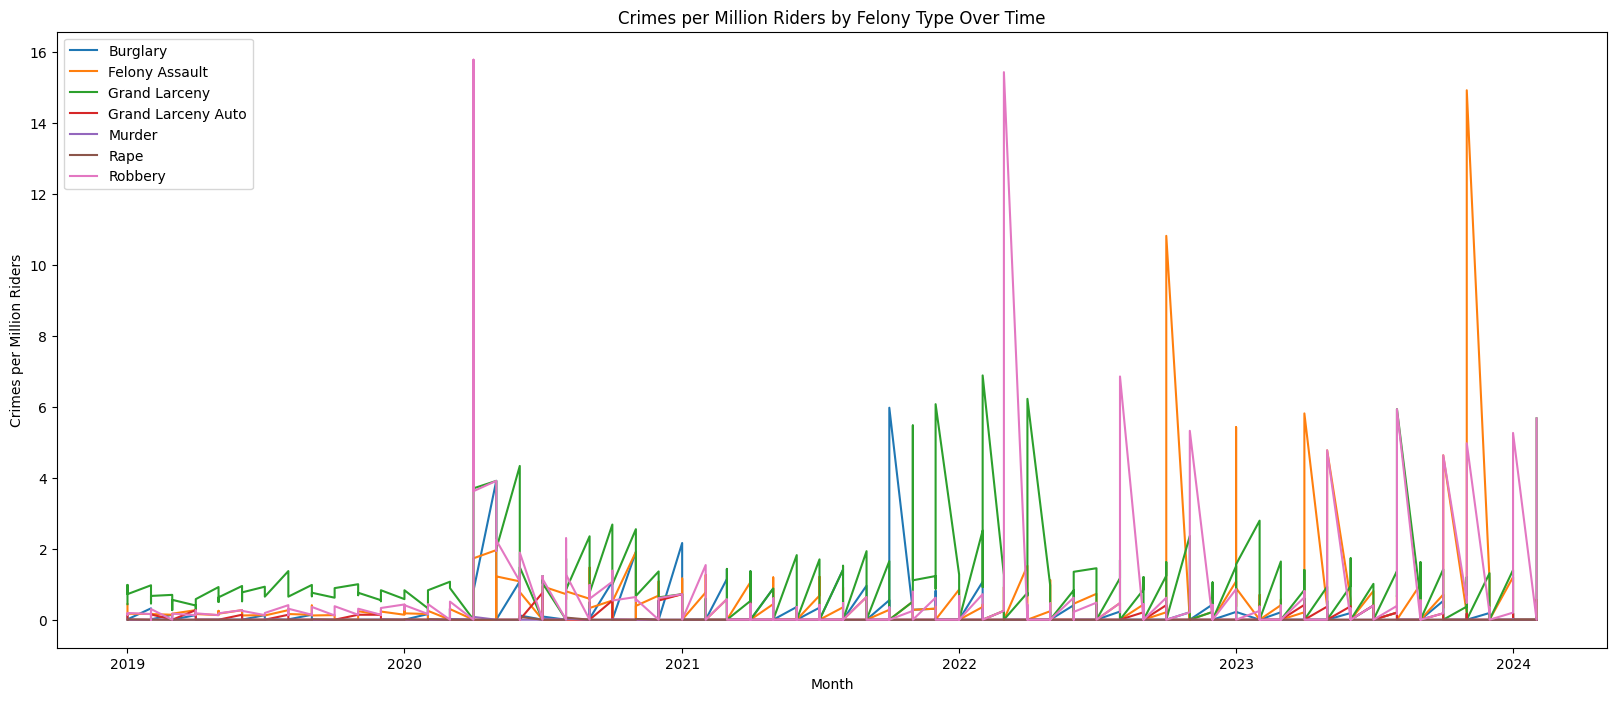

In [107]:
for felony_type, df in data.groupby('Felony Type'):
    plt.plot(df['Month'], df['Crimes per Million Riders'], label=felony_type)
plt.title('Crimes per Million Riders by Felony Type Over Time')
plt.xlabel('Month')
plt.ylabel('Crimes per Million Riders')
plt.legend()
plt.show()